In [1]:
%matplotlib inline


# Linear OT mapping estimation






In [2]:
# Author: Remi Flamary <remi.flamary@unice.fr>
#
# License: MIT License

import numpy as np
import pylab as pl
import ot

Generate data
-------------



In [3]:
n = 1000
d = 2
sigma = .1

# source samples
angles = np.random.rand(n, 1) * 2 * np.pi
xs = np.concatenate((np.sin(angles), np.cos(angles)),
                    axis=1) + sigma * np.random.randn(n, 2)
xs[:n // 2, 1] += 2


# target samples
anglet = np.random.rand(n, 1) * 2 * np.pi
xt = np.concatenate((np.sin(anglet), np.cos(anglet)),
                    axis=1) + sigma * np.random.randn(n, 2)
xt[:n // 2, 1] += 2


A = np.array([[1.5, .7], [.7, 1.5]])
b = np.array([[4, 2]])
xt = xt.dot(A) + b

Plot data
---------



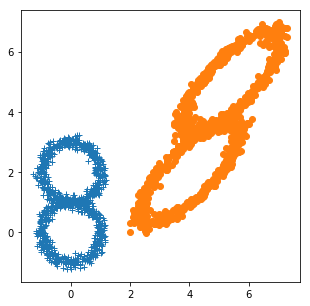

In [4]:
pl.figure(1, (5, 5))
pl.plot(xs[:, 0], xs[:, 1], '+')
pl.plot(xt[:, 0], xt[:, 1], 'o')

Estimate linear mapping and transport
-------------------------------------



In [5]:
Ae, be = ot.da.OT_mapping_linear(xs, xt)

xst = xs.dot(Ae) + be

Plot transported samples
------------------------



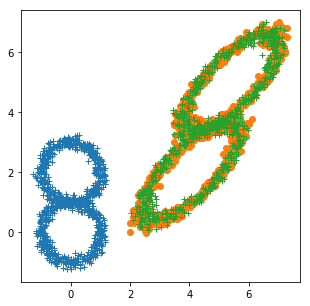

In [6]:
pl.figure(1, (5, 5))
pl.clf()
pl.plot(xs[:, 0], xs[:, 1], '+')
pl.plot(xt[:, 0], xt[:, 1], 'o')
pl.plot(xst[:, 0], xst[:, 1], '+')

pl.show()

Load image data
---------------



In [7]:
def im2mat(I):
    """Converts and image to matrix (one pixel per line)"""
    return I.reshape((I.shape[0] * I.shape[1], I.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(I):
    return np.clip(I, 0, 1)


# Loading images
I1 = pl.imread('../data/ocean_day.jpg').astype(np.float64) / 256
I2 = pl.imread('../data/ocean_sunset.jpg').astype(np.float64) / 256


X1 = im2mat(I1)
X2 = im2mat(I2)

Estimate mapping and adapt
----------------------------



In [8]:
mapping = ot.da.LinearTransport()

mapping.fit(Xs=X1, Xt=X2)


xst = mapping.transform(Xs=X1)
xts = mapping.inverse_transform(Xt=X2)

I1t = minmax(mat2im(xst, I1.shape))
I2t = minmax(mat2im(xts, I2.shape))

# %%

Plot transformed images
-----------------------



Text(0.5,1,'Inverse mapping Im. 2')

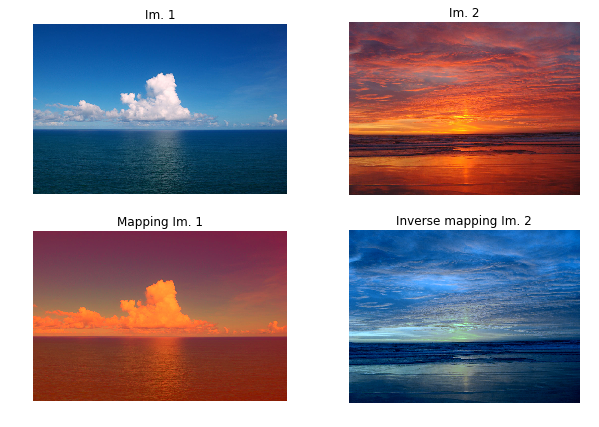

In [9]:
pl.figure(2, figsize=(10, 7))

pl.subplot(2, 2, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Im. 1')

pl.subplot(2, 2, 2)
pl.imshow(I2)
pl.axis('off')
pl.title('Im. 2')

pl.subplot(2, 2, 3)
pl.imshow(I1t)
pl.axis('off')
pl.title('Mapping Im. 1')

pl.subplot(2, 2, 4)
pl.imshow(I2t)
pl.axis('off')
pl.title('Inverse mapping Im. 2')